 ## Анализ данных по COVID-19

 ["Источник данных"](путь)

In [1]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df_0 = pd.read_csv("data/covid_19_data.csv")
df_0.head(10)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [4]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [5]:
# смотрим последнюю дату
df_0["ObservationDate"].iloc[-1]

'05/29/2021'

In [6]:
df_0.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [7]:
# удаление не нужных столбцов\
df_1 = df_0.drop(['SNo', 'Last Update'], axis=1)
df_1.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [42]:
# проверка на дубликат
df_1.duplicated().sum()

0

In [43]:
# удаление дубликата
df_1 = df_1.drop_duplicates()

In [44]:
# страны
df_1['Country/Region'].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', 'Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Czech Republic', 'Armenia', 'Dominican Republic', 'Indonesia',
       'Portugal', 'Andorra', '

In [45]:
# убираем артефакты из названия стран
df_1['Country/Region'] = df_1['Country/Region'].str.strip(" ,()'")

In [46]:
# изучаем страну "Others"
df_1.loc[df_1['Country/Region'] == "Others", :]


,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
965,02/07/2020,Cruise Ship,Others,61.0,0.0,0.0
1039,02/08/2020,Cruise Ship,Others,61.0,0.0,0.0
1113,02/09/2020,Diamond Princess cruise ship,Others,64.0,0.0,0.0
1181,02/10/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1255,02/11/2020,Diamond Princess cruise ship,Others,135.0,0.0,0.0
1328,02/12/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1403,02/13/2020,Diamond Princess cruise ship,Others,175.0,0.0,0.0
1479,02/14/2020,Diamond Princess cruise ship,Others,218.0,0.0,0.0
1554,02/15/2020,Diamond Princess cruise ship,Others,285.0,0.0,0.0
1628,02/16/2020,Diamond Princess cruise ship,Others,355.0,0.0,0.0


In [47]:
# конвертация временных данных
data = "03/23/2020"
pd.to_datetime(data).date()

datetime.date(2020, 3, 23)

In [48]:
df_2 = df_1.copy()

df_2['ObservationDate'] = pd.to_datetime(df_2['ObservationDate'])
df_2.loc[0, 'ObservationDate']

Timestamp('2020-01-22 00:00:00')

In [49]:
# поэлементно извлекаем только даты 

df_2['ObservationDate'] = df_2['ObservationDate'].apply(lambda ts: ts.date())
df_2.loc[0, 'ObservationDate']

datetime.date(2020, 1, 22)

In [64]:
# группировка данных по датам

w_data = df_2.groupby("ObservationDate").sum()
w_data.head(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,,
2020-01-22,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,Mainland ChinaMainland ChinaMainland ChinaMain...,557.0,17.0,30.0
2020-01-23,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,Mainland ChinaMainland ChinaMainland ChinaMain...,653.0,17.0,32.0
2020-01-24,HubeiGuangdongZhejiangBeijingChongqingHunanGua...,Mainland ChinaMainland ChinaMainland ChinaMain...,941.0,26.0,39.0
2020-01-25,HubeiGuangdongZhejiangChongqingHunanBeijingAnh...,Mainland ChinaMainland ChinaMainland ChinaMain...,1437.0,42.0,42.0
2020-01-26,HubeiGuangdongZhejiangHenanChongqingHunanBeiji...,Mainland ChinaMainland ChinaMainland ChinaMain...,2118.0,56.0,56.0


In [67]:
w_data.iloc[-1]

Province/State    AbruzzoAcreAdygea RepublicAguascalientesAichiA...
Country/Region    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
Confirmed                                               169951560.0
Deaths                                                    3533619.0
Recovered                                               107140669.0
Name: 2021-05-29, dtype: object

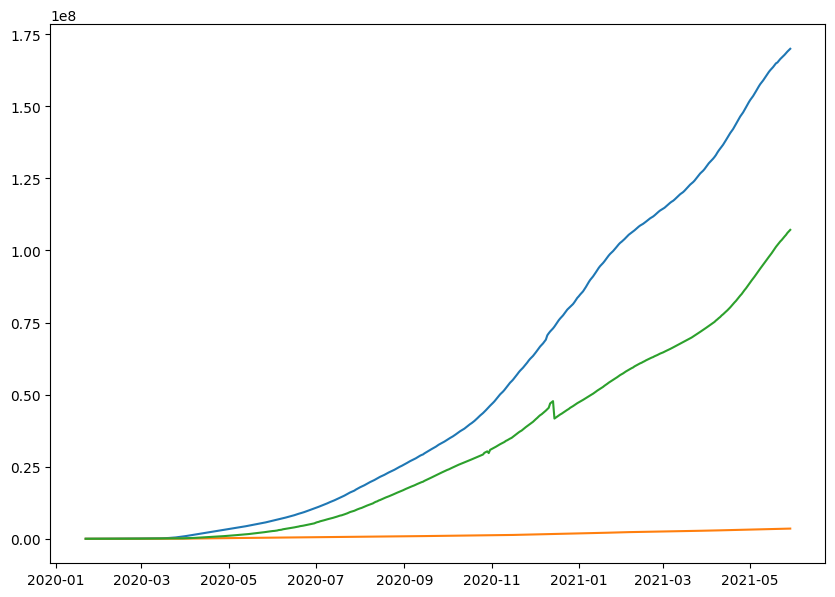

In [57]:
# визуализация динамики пандемии по всему миру
plt.figure(figsize=(10, 7))

plt.plot(w_data.index, w_data["Confirmed"])
plt.plot(w_data.index, w_data["Deaths"])
plt.plot(w_data.index, w_data["Recovered"])

In [77]:
# группировка по странам, и датам
cd_data = df_1.groupby(['Country/Region', 'ObservationDate']).sum()
cd_data.head(10)

Province/State  Confirmed  Deaths  Recovered
Country/Region ObservationDate                                             
Afghanistan    01/01/2021                   0    51526.0  2191.0    41727.0
               01/02/2021                   0    51526.0  2191.0    41727.0
               01/03/2021                   0    51526.0  2191.0    41727.0
               01/04/2021                   0    53011.0  2237.0    42530.0
               01/05/2021                   0    53105.0  2244.0    42666.0
               01/06/2021                   0    53105.0  2244.0    42666.0
               01/07/2021                   0    53207.0  2253.0    43291.0
               01/08/2021                   0    53332.0  2257.0    43440.0
               01/09/2021                   0    53400.0  2264.0    43740.0
               01/10/2021                   0    53489.0  2277.0    43948.0

In [78]:
# данные по россии
ru_data = cd_data.loc['Russia', :]
ru_data.head(10)

,Province/State,Confirmed,Deaths,Recovered
ObservationDate,,,,
01/01/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3153960.0,56798.0,2553467.0
01/02/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3179898.0,57235.0,2572279.0
01/03/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3203743.0,57730.0,2591937.0
01/04/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3226758.0,58203.0,2612934.0
01/05/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3250713.0,58706.0,2635242.0
01/06/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3274615.0,59137.0,2657994.0
01/07/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3297833.0,59628.0,2681373.0
01/08/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3321163.0,60067.0,2702949.0
01/09/2021,Adygea RepublicAltai KraiAltai RepublicAmur Ob...,3344175.0,60523.0,2726336.0


In [79]:
# данные максимумов по странам
max_df = cd_data.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered']].max()

max_df.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,70111.0,2899.0,57281.0
Albania,132297.0,2449.0,129215.0
Algeria,128456.0,3460.0,89419.0
Andorra,13693.0,127.0,13416.0
Angola,34180.0,757.0,27646.0


In [81]:
max_df.sort_values("Confirmed", ascending=False).head(10)

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,6399531.0
India,27894800.0,325972.0,25454320.0
Brazil,16471600.0,461057.0,14496224.0
France,5978650.0,109518.0,390878.0
Turkey,5235978.0,47271.0,5094279.0
Russia,4995613.0,118781.0,4616422.0
UK,4496823.0,128037.0,15481.0
Italy,4213055.0,126002.0,3845087.0
Argentina,3732263.0,77108.0,3288467.0


In [82]:
# группировка по странам, провинциям и датам
cpd_data = df_1.groupby(['Country/Region', 'Province/State', 'ObservationDate']).sum()
cpd_data.head(10)

Confirmed  \
Country/Region Province/State               ObservationDate              
Australia      Australian Capital Territory 01/01/2021           118.0   
                                            01/02/2021           118.0   
                                            01/03/2021           118.0   
                                            01/04/2021           118.0   
                                            01/05/2021           118.0   
                                            01/06/2021           118.0   
                                            01/07/2021           118.0   
                                            01/08/2021           118.0   
                                            01/09/2021           118.0   
                                            01/10/2021           118.0   

                                                             Deaths  Recovered  
Country/Region Province/State               ObservationDate                     
Australia      Australian Capital Territory 01/01/2021          3.0      114.0  
                                            01/02/2021          3.0      114.0  
                                            01/03/2021          3.0      114.0  
                                            01/04/2021          3.0      115.0  
                                            01/05/2021          3.0      115.0  
                                            01/06/2021          3.0      115.0  
                                            01/07/2021          3.0      115.0  
                                            01/08/2021          3.0      115.0  
                                            01/09/2021          3.0      115.0  
                                            01/10/2021          3.0      115.0

In [71]:
df_1.columns

Index(['ObservationDate', 'Province/State', 'Country/Region', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')